# 基于机器学习的径流预报

## 课程目标
#### <font color="red">整体目标</font>：能够综合利用特征工程、机器学习和集成学习等技术实现径流预报。
#### <font color="red">具体目标</font>：
- 数据分析：了解数据集，进行数据统计分析和探索性数据分析。
- 特征工程：分别实现2种特征归一化方法和2种特征选择方法。
- 机器学习：选择2种机器学习算法实现给定单个流域的径流预报，并确定预报精度最优的特征工程方法+机器学习算法组合。
- 流域聚类：要求利用1种聚类算法将水文单元中的流域划分为不同的簇。
- 空间多尺度建模：针对给定水文单元内的多个流域，分别进行分区建模和全区建模，并确定预报精度最优的特征工程方法+机器学习算法组合。
- 集成学习：使用集成学习当中的Stacking和简单平均法将2种不同机器学习模型的预报结果进行集成。
#### <font color="red">算法技能目标</font>：能够掌握相关特征工程、机器学习算法和集成学习算法。
#### <font color="red">编程技能目标</font>：能够熟练使用python编程语言进行数据的处理、分析、建模和评估。
#### <font color="red">思政目标</font>：掌握机器学习技术本领，服务于祖国和人民。

## 一、数据分析

#### 数据包括Date,Discharge,Dayl,Prcp,Srad,Swe,Tmax,Tmin,Vp字段
- Date: 日期
- Discharge: 流量
- Dayl: 每天白天的持续时间（以秒为单位）。此计算基于一天中太阳位于假设的平坦地平线上方的时间段
- Prcp: 每日总降水量（毫米）。所有形式降水的总和转换为水当量深度。
- Srad: 入射短波辐射通量密度（以瓦/平方米为单位），取一天中白天时段的平均值。注：每日总辐射量（MJ/m2/day）可计算如下：((srad (W/m2) * dayl (s/day))/l,000,000)
- Swe:  雪水当量，单位为千克每平方米。积雪中所含的水量。
- Tmax: 每日最高 2 m 气温（摄氏度）。
- Tmin: 每日最低 2 m 气温（摄氏度）。
- Vp:   水蒸气压（以帕斯卡为单位）。日平均水蒸气分压。


--------------------数据描述：--------------------
         Discharge          Dayl         Prcp         Srad     Swe  \
count  1822.000000   1822.000000  1822.000000  1822.000000  1822.0   
mean    209.216038  43216.345483     3.492448   322.935248     0.0   
std     222.645757   7098.144770     5.596613   105.339201     0.0   
min       8.585467  32967.655733     0.000000    76.345867     0.0   
25%      75.283500  36263.325333     0.058700   239.322133     0.0   
50%     143.445467  43200.000133     1.046533   320.776733     0.0   
75%     266.899333  50136.672667     4.712433   408.248733     0.0   
max    3589.406667  53432.344133    71.531333   574.893467     0.0   

              Tmax         Tmin           Vp  one_Discharge  two_Discharge  \
count  1822.000000  1822.000000  1822.000000    1822.000000    1822.000000   
mean     15.532327     4.108228   984.751138     209.210016     209.180297   
std       9.927955     9.196090   563.974375     222.646410     222.650794   
min      -

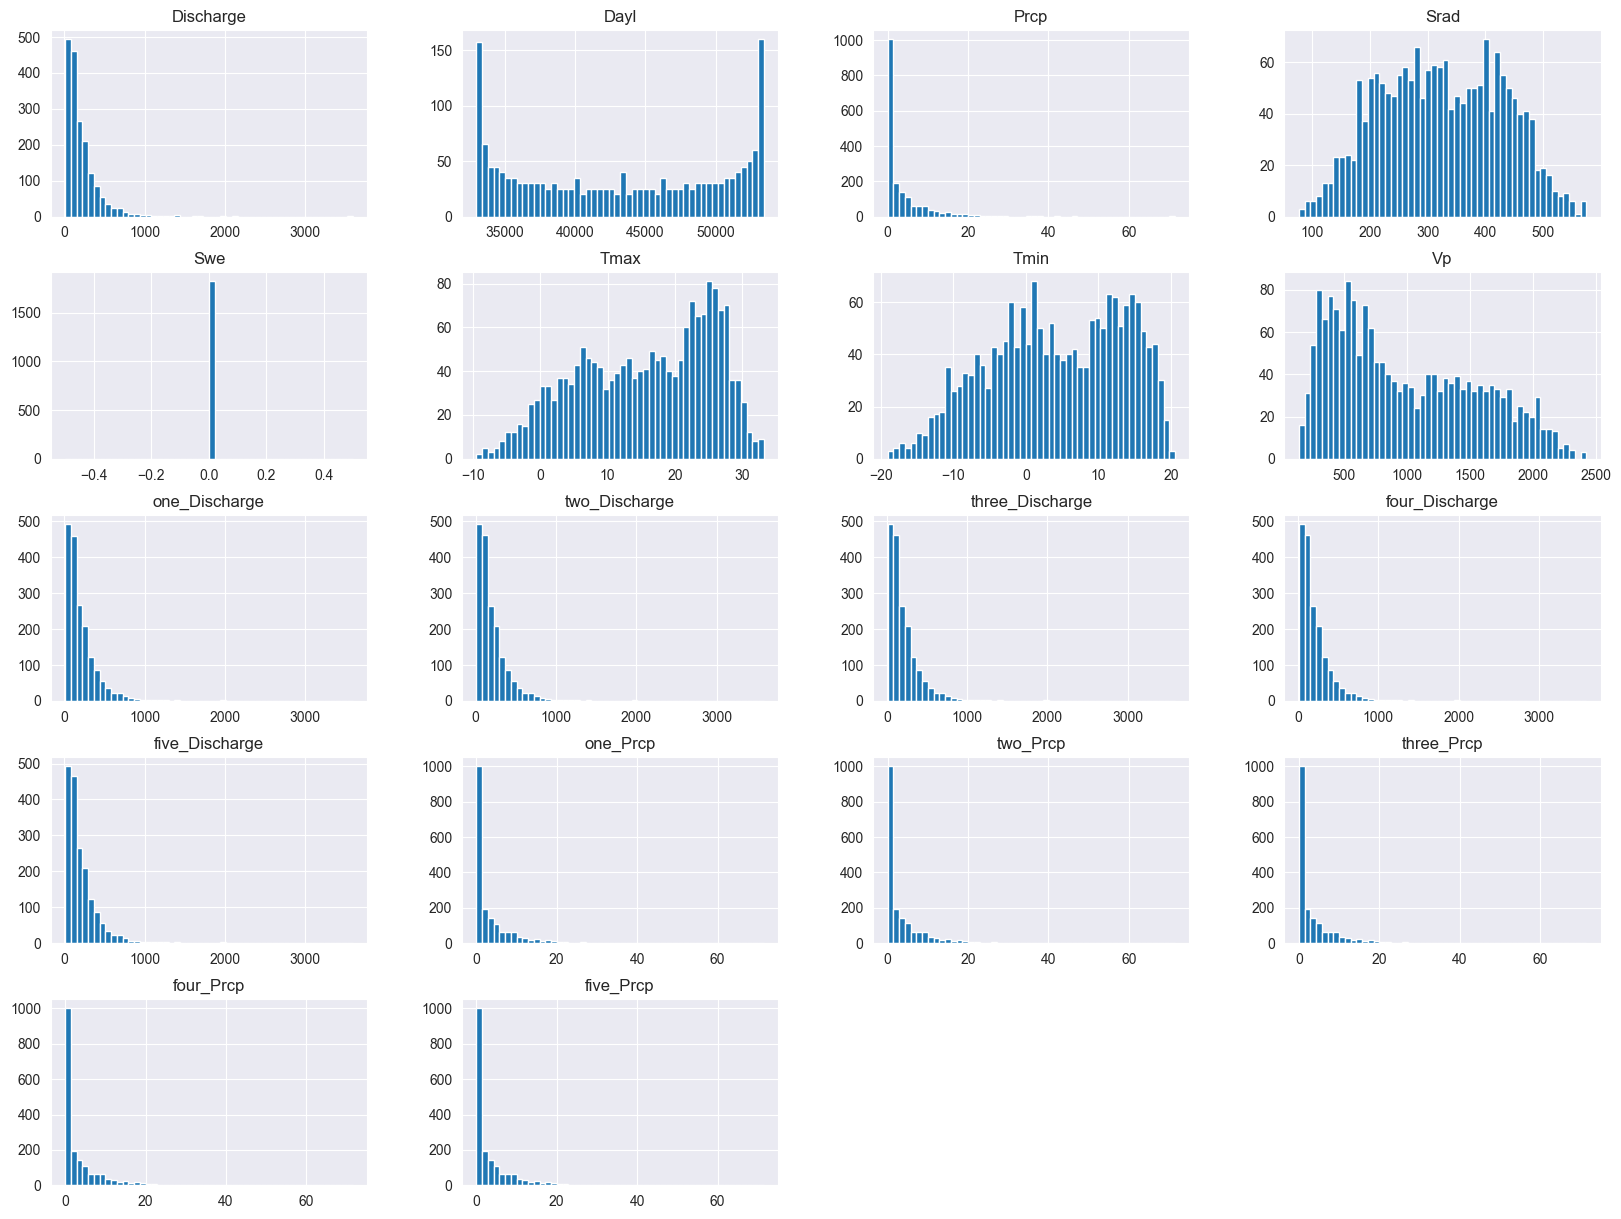

--------------------缺失值检测：--------------------
是否有缺失值： False
--------------------全为零检测：--------------------
是否有全为零的列： True
全为零的列数量： 1
全为零的列名：
Index(['Swe'], dtype='object')
是否有全为零的行： False
--------------------相关性矩阵：--------------------
                 Discharge      Dayl      Prcp      Srad  Swe      Tmax  \
Discharge         1.000000 -0.022948  0.555790 -0.126137  NaN -0.116498   
Dayl             -0.022948  1.000000  0.106966  0.655524  NaN  0.777165   
Prcp              0.555790  0.106966  1.000000 -0.372765  NaN  0.075536   
Srad             -0.126137  0.655524 -0.372765  1.000000  NaN  0.534614   
Swe                    NaN       NaN       NaN       NaN  NaN       NaN   
Tmax             -0.116498  0.777165  0.075536  0.534614  NaN  1.000000   
Tmin             -0.062558  0.771465  0.211032  0.329548  NaN  0.950519   
Vp               -0.111692  0.762152  0.207444  0.303192  NaN  0.907013   
one_Discharge     0.723065 -0.018888  0.104729  0.008273  NaN -0.136109   
two_Discharge 

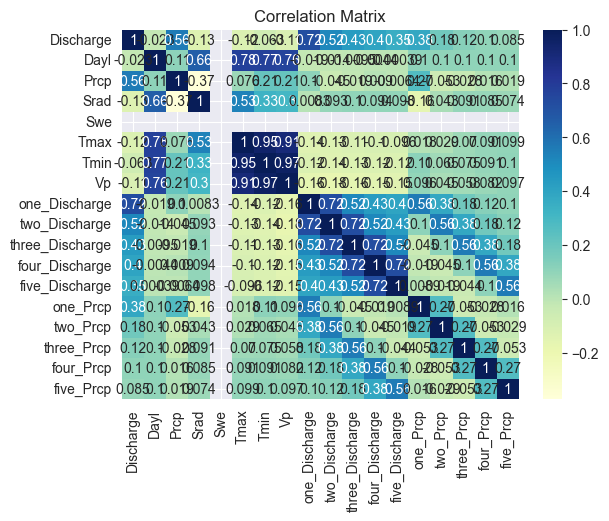

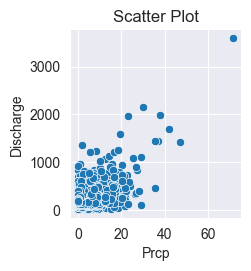

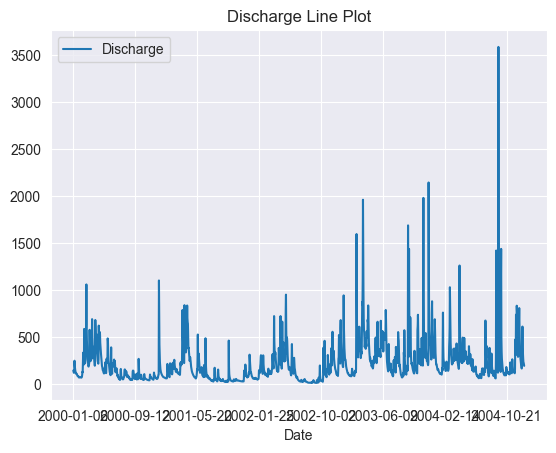

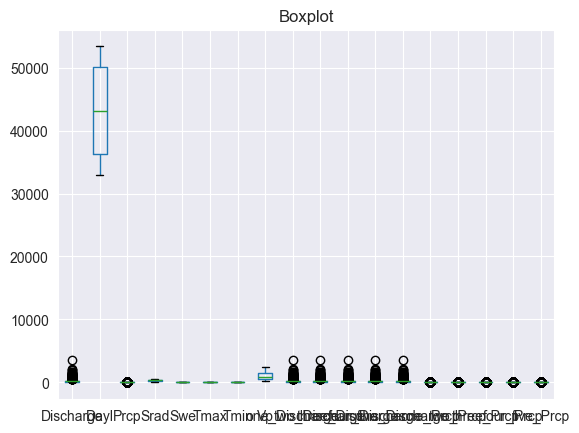

In [2]:
from utils.data_process import read_from_dataset_folders, add_5days_before

from Data_Analysis import data_analysis

data = read_from_dataset_folders(drop_Swe=False)
data = add_5days_before(data)
data_analysis(data)

## 二、特征工程
#### 我们举出了四种特征选择方法，分别是：
- 皮尔逊相关系数法
- 最大信息系数法
- 距离相关系数法
- SVM法
#### 我们举出了四种特征归一化方法，分别是：
- 最大最小归一化
- Z-score归一化
- Z-score简单归一化
- 对数归一化。

In [10]:
from utils.data_process import read_from_csv, Z_score, min_max, Z_score_simple, log_normalization

data = read_from_csv(path="./data/01333000.csv")
Z_score_data, _1, _2 = Z_score(data)
min_max_data, _1, _2 = min_max(data)
Z_score_simple_data = Z_score_simple(data)
log_data = log_normalization(data)
Z_score_data = Z_score_data.drop("Date", axis=1)
min_max_data = min_max_data.drop("Date", axis=1)
Z_score_simple_data = Z_score_simple_data.drop("Date", axis=1)
log_data = log_data.drop("Date", axis=1)
# 打印Z_score_data的均值和方差，min_max_data的最大值和最小值，Z_score_simple_data的均值和方差，log_data的最大值和最小值
print("经过Z_score归一化后得到的数据的均值和方差:")
print(Z_score_data.mean(), Z_score_data.var())
print("经过min_max归一化后得到的数据的最大值和最小值:")
print(min_max_data.max(), min_max_data.min())
print("经过Z_score_simple归一化后得到的数据的均值和方差:")
print(Z_score_simple_data.mean(), Z_score_simple_data.var())
print("经过log归一化后得到的数据的最大值和最小值:")
print(log_data.max(), log_data.min())

经过Z_score归一化后得到的数据的均值和方差:
Discharge         -0.010923
Dayl              -0.000576
Prcp              -0.001084
Srad               0.005450
Tmax               0.001648
Tmin              -0.035067
Vp                -0.028862
one_Discharge     -0.010637
two_Discharge     -0.010189
three_Discharge   -0.009555
four_Discharge    -0.008835
five_Discharge    -0.007955
one_Prcp          -0.001340
two_Prcp          -0.001234
three_Prcp        -0.001282
four_Prcp         -0.001282
five_Prcp         -0.001529
dtype: float64 Discharge          0.926348
Dayl               1.000256
Prcp               0.993259
Srad               0.991301
Tmax               1.027425
Tmin               1.038927
Vp                 0.973443
one_Discharge      0.926492
two_Discharge      0.926827
three_Discharge    0.927416
four_Discharge     0.928126
five_Discharge     0.929374
one_Prcp           0.993050
two_Prcp           0.992865
three_Prcp         0.992897
four_Prcp          0.992897
five_Prcp          0.993036
dtype: 

C:\Users\Whisper\.conda\envs\ZHXMSJ\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 三、机器学习回归
- 近年来，随着各类机器学习算法的提出，采用机器学习方法进行中长期径流预报逐渐成为趋势。闪丽洁等在大通、屏山和汉口3个站点基于BP人工神经网络模型开展径流预报研究，模拟效果较好；郑炎辉等在新丰江水库构建了机器学习模型，开展枯水期中长期径流预报，计算结果精度较高。 预报因子筛选对于提高预报精度具有十分重要的意义。国内外众多学者在筛选预报因子时，常将历史径流和降雨等这些与流域径流密切相关的因素考虑在内。由于主成分分析法能够有效地处理因子冗余和信息重叠等问题，因此被广泛应用于水文预报中。周淼等以径流和降雨等气象因子为数据驱动，基于主成分分析采用局域回归的方法对宜昌站径流进行预报，预测精度较高。
- **主成分分析、BP人工神经网络、随机森林模型、支持向量回归模型**成为径流预测的常规手段

--------------------BP神经网络模型评估--------------------
使用特征： ['one_Discharge', 'Prcp', 'Tmin', 'Tmax', 'one_Prcp']
训练集均方误差： 19.88121223913983
训练集R2： 0.8755827716252226
测试集均方误差： 32.03128110840308
测试集R2： 0.6821261374517136
--------------------------------------------------


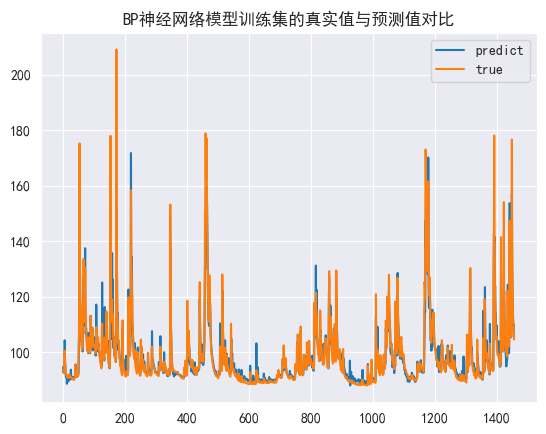

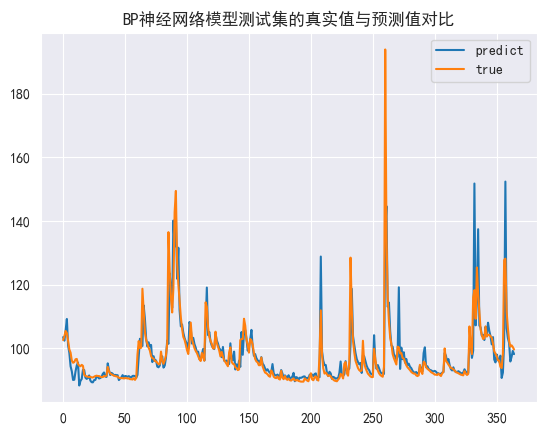

In [17]:
import pandas as pd
from utils.data_process import Z_score, add_5days_before, reverse_min_max, reverse_Z_score
from utils.feature_select import Feature_Select
from Discharge_predict import Discharge_Predict, get_best_model

ignore_warning = True
if ignore_warning:
    import warnings
    warnings.filterwarnings("ignore")
    
# mode分为"网格搜索"和"最优解结果"两种
mode = "最优解结果"

if mode == "最优解结果":
    data = pd.read_csv("./data/01333000.csv")
    data = data.drop("Swe", axis=1)
    data = add_5days_before(data)
    data, origin_mean, origin_std = Z_score(data)
    selector = Feature_Select()
    result = selector.SVM2nfeature(data, n=5)
    
    discharge_predict = Discharge_Predict(data, result, reverse_method=reverse_min_max, reverse_param=(origin_mean, origin_std))
    discharge_predict.BPNN_Discharge(learning_rate_init=0.01, is_save=False)
    # discharge_predict.SVM_Discharge(C=1, gamma='scale', tol=0.001)

elif mode == "网格搜索":
    import time
    print("开始时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    data = pd.read_csv("./data/01333000.csv")
    data = data.drop("Swe", axis=1)
    get_best_model(data, cv=3, feature_num=5, is_reverse=False)
    print("结束时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    
else:
    raise ValueError("mode参数错误")


## 四、流域聚类
#### 我们完成了三种流域聚类方法，分别是：
- K-means
- DBSCAN
- 层次聚类
#### 最终我们选择了K-means聚类方法，使用肘部法则选择最佳的聚类数目。

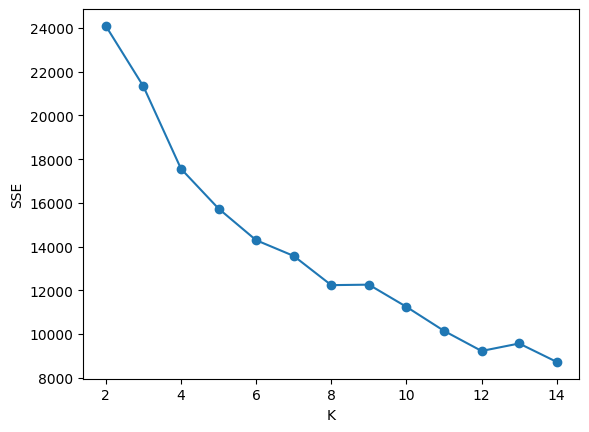

最优聚类数量为:  8


In [2]:
from utils.Basin_Clustering import Basin_Clustering
bc = Basin_Clustering("./data/dataset02", Normalize_func="Z_score", is_PCA=True)
# 肘部法则确定最优聚类数量
bc.elbow_method(n_components=5, max_k=15)
print("最优聚类数量为: ", 8)

In [7]:
from utils.Basin_Clustering import Basin_Clustering
import json
bc = Basin_Clustering("./data/dataset02", Normalize_func="Z_score", is_PCA=True)
bc.fit(n_components=5, n_clusters=8)
cluster_dict = bc.genorate_Clustering_dict()
cluster_dict = sorted(cluster_dict.items(), key=lambda x: x[0])
with open("./data/cluster_result.json", "w") as f:
    json.dump(cluster_dict, f)
for i in cluster_dict:
    print("第{}类有{}个流域，分别是{}".format(i[0], len(i[1]), i[1]))
for i in bc.Clustering_result.keys():
    print("流域{}属于第{}类".format(i, bc.Clustering_result[i]))

第0类有8个流域，分别是['01350000.csv', '01413500.csv', '01423000.csv', '01510000.csv', '01532000.csv', '01539000.csv', '01543000.csv', '01550000.csv']
第1类有14个流域，分别是['01605500.csv', '01620500.csv', '01632000.csv', '01632900.csv', '01666500.csv', '02011400.csv', '02011460.csv', '02013000.csv', '02014000.csv', '02015700.csv', '02017500.csv', '02027000.csv', '02027500.csv', '02028500.csv']
第2类有10个流域，分别是['01439500.csv', '01440000.csv', '01440400.csv', '01451800.csv', '01544500.csv', '01545600.csv', '01547700.csv', '01549500.csv', '01552500.csv', '01557500.csv']
第3类有6个流域，分别是['01606500.csv', '01644000.csv', '01664000.csv', '01667500.csv', '02016000.csv', '02018000.csv']
第4类有3个流域，分别是['01543500.csv', '01548500.csv', '01552000.csv']
第5类有8个流域，分别是['01484100.csv', '01485500.csv', '01486000.csv', '01487000.csv', '01658500.csv', '01669000.csv', '01669520.csv', '02038850.csv']
第6类有15个流域，分别是['01411300.csv', '01466500.csv', '01491000.csv', '01567500.csv', '01568000.csv', '01580000.csv', '01583500.csv', '01586610.

## 五、空间多尺度建模

In [ ]:
from utils.data_process import read_from_list
from Discharge_predict import get_best_model
import json
import os
import time
if os.path.exists("./data/cluster_result.json"):
    with open("./data/cluster_result.json", "r") as f:
        cluster_dict = json.load(f)
else:
    from utils.Basin_Clustering import Basin_Clustering
    bc = Basin_Clustering("./data/dataset02", Normalize_func="Z_score", is_PCA=True)
    bc.fit(n_components=5, n_clusters=8)
    cluster_dict = bc.genorate_Clustering_dict()
    cluster_dict = {int(k): v for k, v in cluster_dict.items()}
    # cluster_dict = sorted(cluster_dict.items(), key=lambda x: x[0])
    print(cluster_dict)
    with open("./data/cluster_result.json", "w") as f:
        json.dump(cluster_dict, f)
print("开始多尺度建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
for i in cluster_dict.keys():
    print("正在进行第{}类的预测".format(i))
    data = read_from_list(data_root="./data/dataset02",data_list=cluster_dict[i])
    get_best_model(data, cv=3, feature_num=5, is_reverse=True, is_data_raw=False, model_save_path="./model/cluster_{}.pkl".format(i))
print("结束多尺度建模，当前时间: {}".format(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())))
    